In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

with open("C:\\Users\\menen\\train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("C:\\Users\\menen\\valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("C:\\Users\\menen\\test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [2]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train.shape
y_train.shape

X_validation.shape
y_validation.shape

X_test.shape
y_test.shape

(12630,)

36

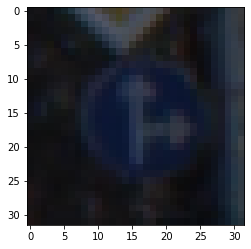

In [3]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

17

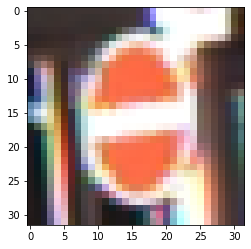

In [4]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

11

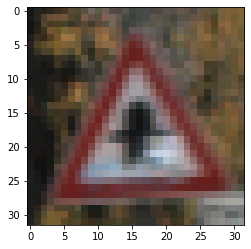

In [5]:
i = 3000
plt.imshow(X_test[i])
y_test[i]

34

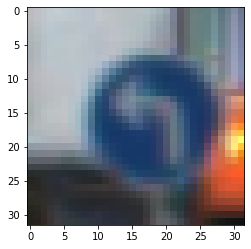

In [6]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_train_gray.shape
X_validation_gray.shape

X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

X_train_gray_norm

array([[[[-0.45052083],
         [-0.38020833],
         [-0.38020833],
         ...,
         [-0.5703125 ],
         [-0.64583333],
         [-0.65885417]],

        [[-0.45572917],
         [-0.375     ],
         [-0.3984375 ],
         ...,
         [-0.5234375 ],
         [-0.55729167],
         [-0.63020833]],

        [[-0.43489583],
         [-0.35677083],
         [-0.40625   ],
         ...,
         [-0.578125  ],
         [-0.56510417],
         [-0.57552083]],

        ...,

        [[-0.51302083],
         [-0.4921875 ],
         [-0.54427083],
         ...,
         [-0.73177083],
         [-0.6953125 ],
         [-0.69010417]],

        [[-0.53385417],
         [-0.49739583],
         [-0.5625    ],
         ...,
         [-0.70052083],
         [-0.6953125 ],
         [-0.6796875 ]],

        [[-0.5078125 ],
         [-0.48958333],
         [-0.55729167],
         ...,
         [-0.6875    ],
         [-0.69010417],
         [-0.6640625 ]]],


       [[[-0.078125  ],


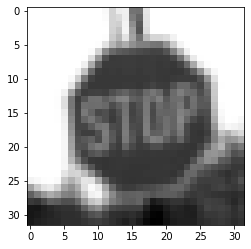

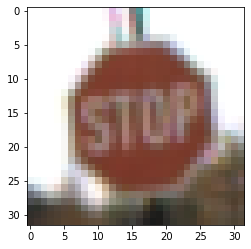

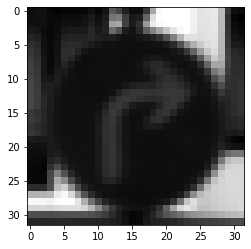

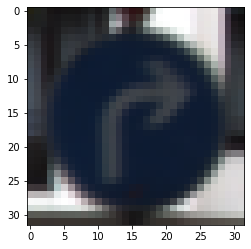

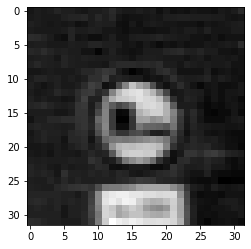

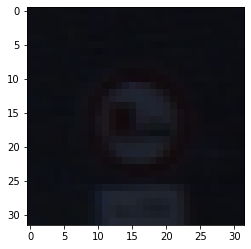

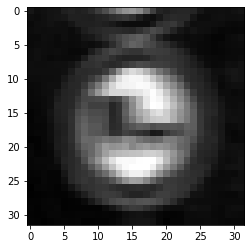

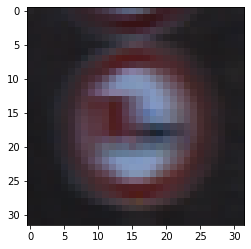

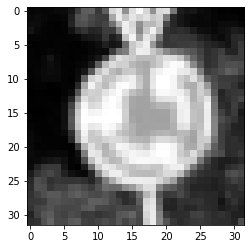

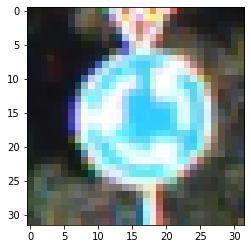

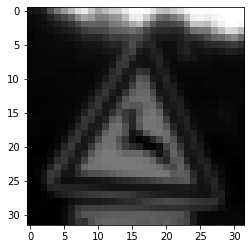

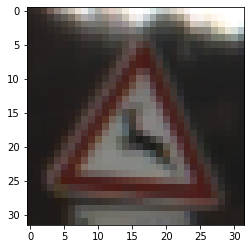

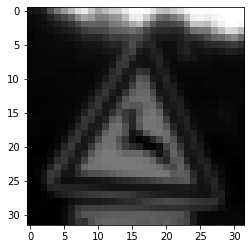

In [8]:
i = 111
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

i = 323
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

i = 416
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

i = 101
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

i = 576
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

i = 110
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size = (10,10), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

Using TensorFlow backend.


cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 300,
             nb_epoch = 5,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))

In [10]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 300,
             nb_epoch = 100,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))

C:\Users\menen\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 19s 551us/step - loss: 2.7664 - accuracy: 0.2761 - val_loss: 1.6052 - val_accuracy: 0.5551
Epoch 2/100
34799/34799 [==============================] - 17s 491us/step - loss: 0.8871 - accuracy: 0.7595 - val_loss: 0.7648 - val_accuracy: 0.7909
Epoch 3/100
34799/34799 [==============================] - 17s 485us/step - loss: 0.4994 - accuracy: 0.8724 - val_loss: 0.5815 - val_accuracy: 0.8472
Epoch 4/100
34799/34799 [==============================] - 17s 477us/step - loss: 0.3569 - accuracy: 0.9115 - val_loss: 0.4790 - val_accuracy: 0.8739
Epoch 5/100
34799/34799 [==============================] - 17s 498us/step - loss: 0.2784 - accuracy: 0.9322 - val_loss: 0.4286 - val_accuracy: 0.8841
Epoch 6/100
34799/34799 [==============================] - 17s 483us/step - loss: 0.2179 - accuracy: 0.9478 - val_loss: 0.3889 - val_accuracy: 0.9005
Epoch 7/100
34799/34799 [==========================

Epoch 55/100
34799/34799 [==============================] - 12s 356us/step - loss: 7.0202e-04 - accuracy: 1.0000 - val_loss: 0.4341 - val_accuracy: 0.9347
Epoch 56/100
34799/34799 [==============================] - 13s 386us/step - loss: 7.0811e-04 - accuracy: 1.0000 - val_loss: 0.4218 - val_accuracy: 0.9370
Epoch 57/100
34799/34799 [==============================] - 12s 340us/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.4568 - val_accuracy: 0.9338
Epoch 58/100
34799/34799 [==============================] - 12s 347us/step - loss: 0.0587 - accuracy: 0.9857 - val_loss: 0.4801 - val_accuracy: 0.9197
Epoch 59/100
34799/34799 [==============================] - 12s 346us/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.3890 - val_accuracy: 0.9376
Epoch 60/100
34799/34799 [==============================] - 12s 347us/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.4360 - val_accuracy: 0.9304
Epoch 61/100
34799/34799 [==============================] - 12s 345us/step - loss: 0.0

history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 500,
             nb_epoch = 1000,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))

In [11]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 1s 114us/step
Test Accuracy: 0.9288202524185181


In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

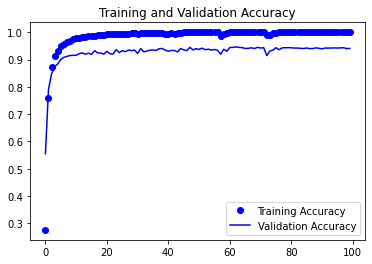

In [14]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

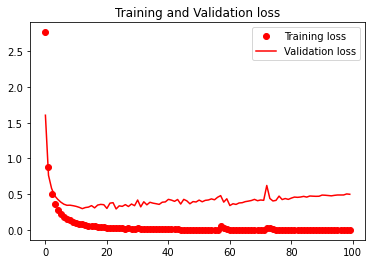

In [15]:
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [16]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

<AxesSubplot:>

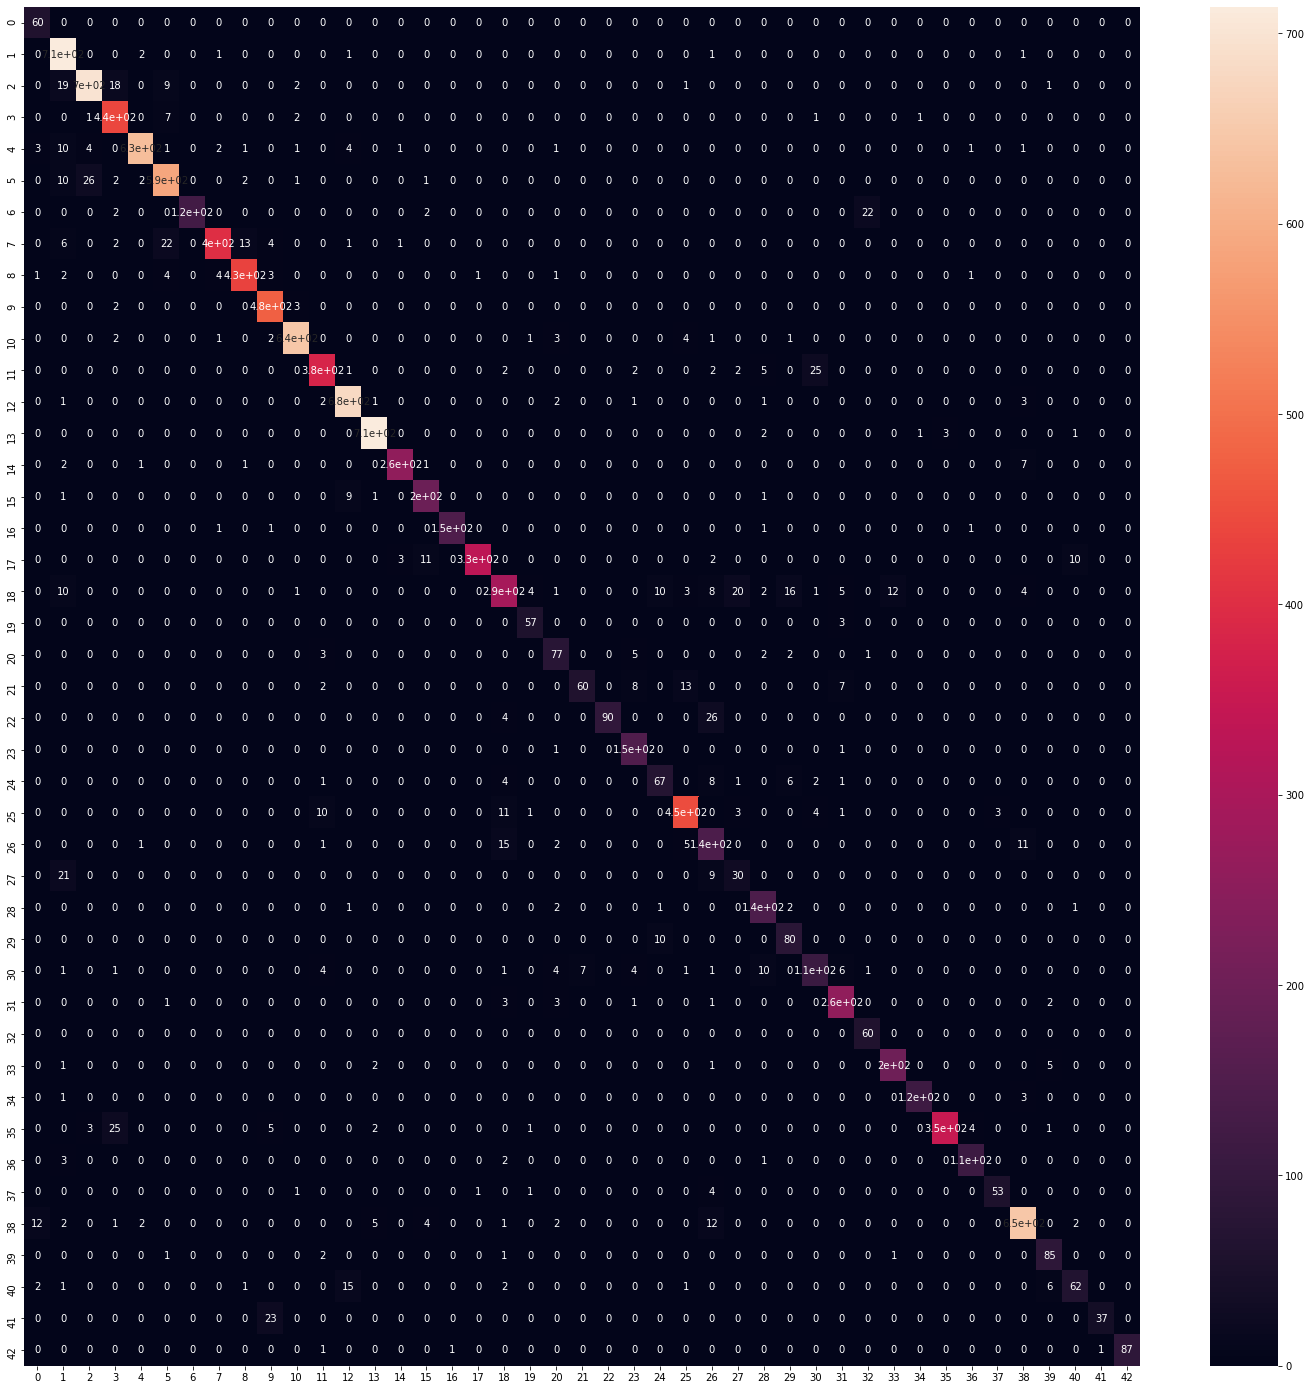

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

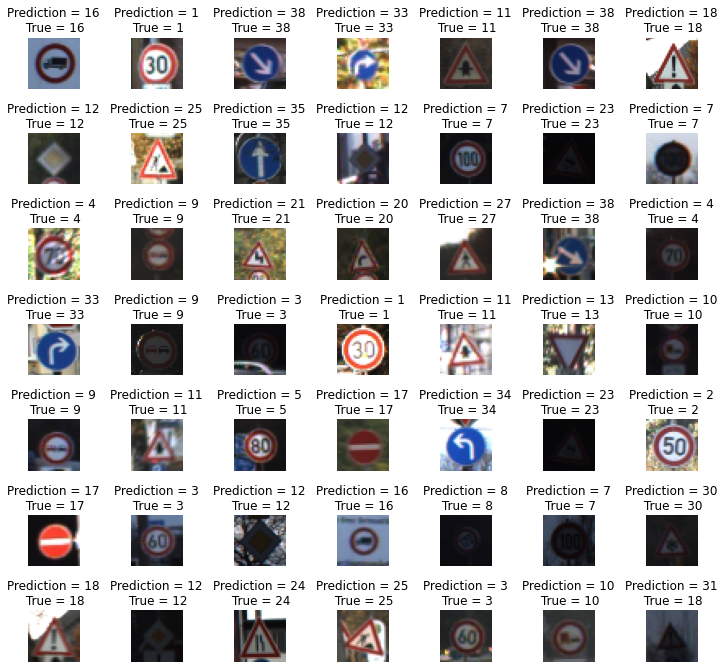

In [18]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)